In [ ]:
import pickle
with open("class_labels.pkl", "rb") as f:
    class_labels = pickle.load(f)

In [76]:
import torch
from torchvision import transforms, models # Import models
from PIL import Image
import matplotlib.pyplot as plt

# Load the same pretrained model
model = models.resnet50(pretrained=False)  # Set False to avoid downloading weights

# Modify the classifier (must match your training setup)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 100)  # Assuming 100 classes

# Load state dict
model.load_state_dict(torch.load("/content/train_model")) # Correctly load the state_dict

# Set to evaluation mode
model.eval()



# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


def upload_image(path, model):
# Load and preprocess image
  image_path = path # Use the provided path argument
  image = Image.open(image_path).convert("RGB")
  input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

  # Move to device
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  input_tensor = input_tensor.to(device)

  # Predict
  with torch.no_grad():
      output = model(input_tensor)

  # Get predicted class index
  _, predicted_class = torch.max(output, 1)

  # Map to class label
  predicted_class_idx = predicted_class.item()

# Check if the predicted class exists in the dictionary
  predicted_label = next((key for key, value in class_labels.items() if value == predicted_class_idx))

  # Display result
  plt.imshow(image)
  plt.title(f"Predicted: {predicted_label}")
  plt.axis("off")
  plt.show()

<ipython-input-76-13531b6db98a>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/train_model")) # Correctly load the state_dict


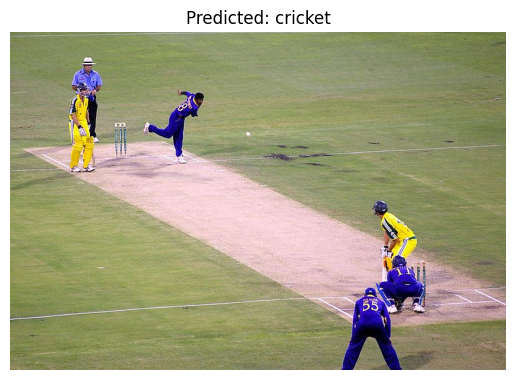

In [ ]:
path = "/content/imagetest.jpg"
upload_image(path)

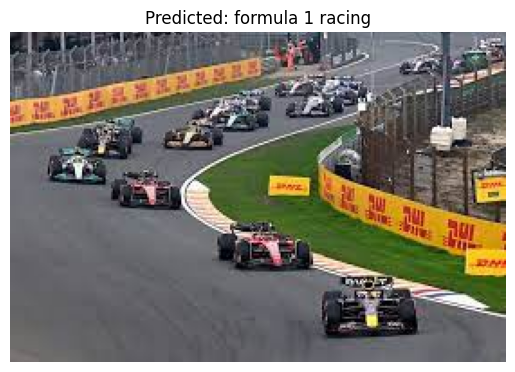

In [ ]:
path = "/content/f12.jpeg"
upload_image(path, model)

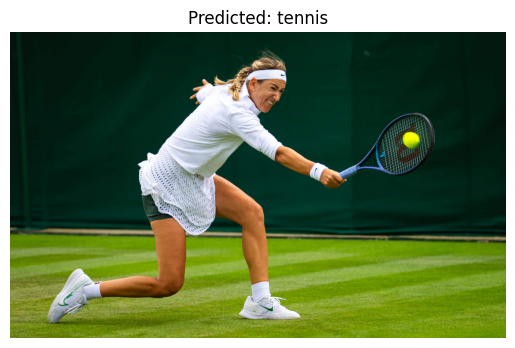

In [75]:
path = "/content/teniis.jpg"
upload_image(path, model)

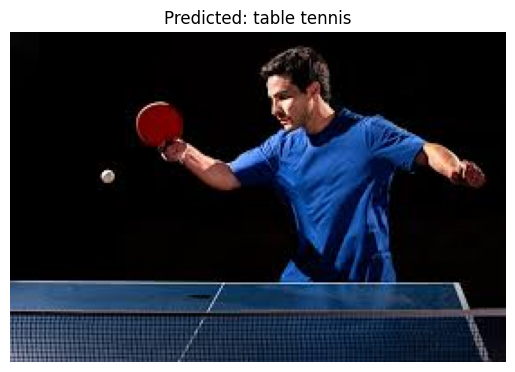

In [77]:
path = "/content/tt.jpeg"
upload_image(path, model)